## Impotamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Cargando conjunto de datos

In [3]:
life_expectancy = pd.read_csv('Life Expectancy Data.csv')

In [4]:
# Mostramos todas las columnas
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# Mostramos las primeras 5 filas del data
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# Realizamos una descripcion para ver el comportamiento del data set
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
# Realizamos un analisis de valores nulos por anio
nan_analysis = pd.DataFrame()

In [8]:
for Year_ in life_expectancy.loc[ : , "Year" ].drop_duplicates():
    countrydf = life_expectancy.loc[ life_expectancy['Year'] == Year_ , : ]    
    for column_ in countrydf.columns:        
        percentage =  np.sum(pd.isna( countrydf.loc[ : , column_ ]  )) / countrydf.shape[0]
        dfrow = pd.DataFrame({
            'Year': [ Year_ ]
            , 'column' : [ column_ ]
            , 'percentage.of.nans' : [ percentage ]
        })
        nan_analysis = pd.concat([nan_analysis, dfrow])

In [9]:
nan_analysis

,Year,column,percentage.of.nans
0,2015,Country,0.000000
0,2015,Year,0.000000
0,2015,Status,0.000000
0,2015,Life expectancy,0.000000
0,2015,Adult Mortality,0.000000
...,...,...,...
0,2000,Population,0.218579
0,2000,thinness 1-19 years,0.010929
0,2000,thinness 5-9 years,0.010929
0,2000,Income composition of resources,0.054645


# Limpieza de valores nulos

In [10]:
df_limpio = life_expectancy

In [11]:
# hacemos un recorrido para ver las columnas con valores nulos
for c_ in df_limpio.columns:
    print(c_)
    print(np.sum(df_limpio[c_].isna()))
    print(" ")

Country
0
 
Year
0
 
Status
0
 
Life expectancy 
10
 
Adult Mortality
10
 
infant deaths
0
 
Alcohol
194
 
percentage expenditure
0
 
Hepatitis B
553
 
Measles 
0
 
 BMI 
34
 
under-five deaths 
0
 
Polio
19
 
Total expenditure
226
 
Diphtheria 
19
 
 HIV/AIDS
0
 
GDP
448
 
Population
652
 
 thinness  1-19 years
34
 
 thinness 5-9 years
34
 
Income composition of resources
167
 
Schooling
163
 


In [19]:
# Columnas a limpiar
columnas_a_limpiar= ['Life expectancy ','Adult Mortality','Alcohol',
                     'Hepatitis B',' BMI ', 'Polio',
                     'Total expenditure','Diphtheria ',
                     'GDP','Population',' thinness  1-19 years',
                     ' thinness 5-9 years','Income composition of resources','Schooling']

In [20]:
# Mediante un ciclo for realizamos la limpieza de estas columnas con la media
for d_ in df_limpio[columnas_a_limpiar]:
    mediana= df_limpio[d_].median()
    df_limpio[d_]=df_limpio[d_].fillna(mediana)

## Comprobamos si se ha realizado la limpieza de manera correcta

In [21]:
for c_ in df_limpio.columns:
    print(c_)
    print(np.sum(df_limpio[c_].isna()))
    print(" ")

Country
0
 
Year
0
 
Status
0
 
Life expectancy 
0
 
Adult Mortality
0
 
infant deaths
0
 
Alcohol
0
 
percentage expenditure
0
 
Hepatitis B
0
 
Measles 
0
 
 BMI 
0
 
under-five deaths 
0
 
Polio
0
 
Total expenditure
0
 
Diphtheria 
0
 
 HIV/AIDS
0
 
GDP
0
 
Population
0
 
 thinness  1-19 years
0
 
 thinness 5-9 years
0
 
Income composition of resources
0
 
Schooling
0
 


## El nuevo dataset sin valores nulos es: df_limpio

In [22]:
df_limpio.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Realizamos el analisis de Bloxplots

## Bloxplots: El objetivo de utilizar cajas de bigotes es para visualizar la dispersión de los datos y para comparar la distribución de los mismo. También se puede utilizar para detectar valores atípicos o "outliers" en los datos.

### Primero se realiza el cálculo de los valores valores atípicos para conocer cuántos son y el porcentaje que representan utilizando el método Tukey. Luego se utiliza la técnica de Winsorize para remover los valores valores atípicos y se muestran los boxplots con y sin los valores atípicos de cada columna.

In [31]:
# Creamos un diccionaron con las columnas que utiilizaremos para realizar los boxplots.
bp_cols= {'Life expectancy ':1, 'Adult Mortality':2,
       'infant deaths':3, 'Alcohol':4, 'percentage expenditure':5, 'Hepatitis B':6,
       'Measles ':7, ' BMI ':8, 'under-five deaths ':9, 'Polio':10, 'Total expenditure':11,
       'Diphtheria ':12, ' HIV/AIDS':13, 'GDP':14, 'Population':15,
       ' thinness  1-19 years':16, ' thinness 5-9 years':17,
       'Income composition of resources':18, 'Schooling':19}

# Calculando la cantidad de valores atípicos y su porcentaje usando el método Tukey.
for columna_o in bp_cols.keys():
    q75, q25 = np.percentile(df_limpio[columna_o], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    ##imprimimos los resultados
    print("La cantidad de valores atípicos para --{}-- es {} y su porcentaje es {}"
          .format(columna_o, len((np.where((df_limpio[columna_o] > max_val) |
                                           (df_limpio[columna_o] < min_val))[0])),
                                           len((np.where((df_limpio[columna_o] > max_val) |
                                           (df_limpio[columna_o] < min_val))[0]))*100/1987))

La cantidad de valores atípicos para --Life expectancy -- es 17 y su porcentaje es 0.8555611474584801
La cantidad de valores atípicos para --Adult Mortality-- es 86 y su porcentaje es 4.3281328636134875
La cantidad de valores atípicos para --infant deaths-- es 315 y su porcentaje es 15.853044791142425
La cantidad de valores atípicos para --Alcohol-- es 3 y su porcentaje es 0.1509813789632612
La cantidad de valores atípicos para --percentage expenditure-- es 389 y su porcentaje es 19.577252138902868
La cantidad de valores atípicos para --Hepatitis B-- es 322 y su porcentaje es 16.205334675390034
La cantidad de valores atípicos para --Measles -- es 542 y su porcentaje es 27.27730246602919
La cantidad de valores atípicos para -- BMI -- es 0 y su porcentaje es 0.0
La cantidad de valores atípicos para --under-five deaths -- es 394 y su porcentaje es 19.828887770508302
La cantidad de valores atípicos para --Polio-- es 279 y su porcentaje es 14.041268243583291
La cantidad de valores atípicos 

## Generación de los boxplots

### Se generan los boxplots con y sin valores atípicos, se guarda el resultado excluyendo los valores atípicos para trabajar con ellos después.

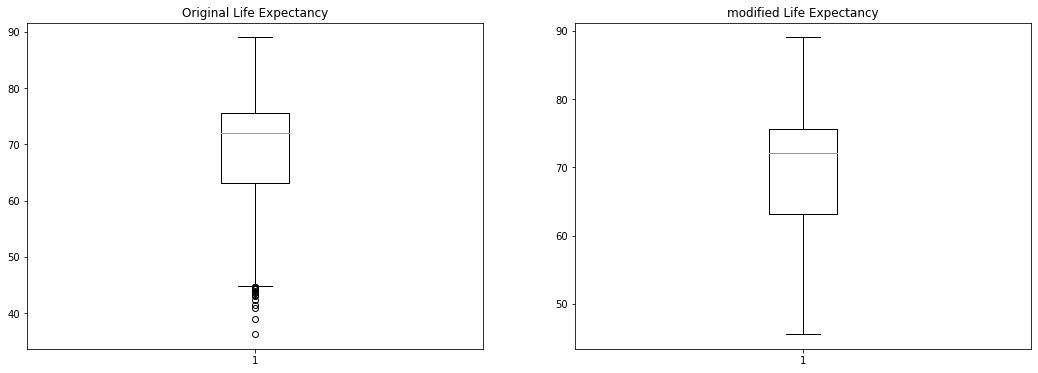

In [33]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = df_limpio['Life expectancy ']
plt.boxplot(original_Life_Expectancy)
plt.title("Original Life Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df_limpio['Life expectancy '],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("modified Life Expectancy")

plt.show()

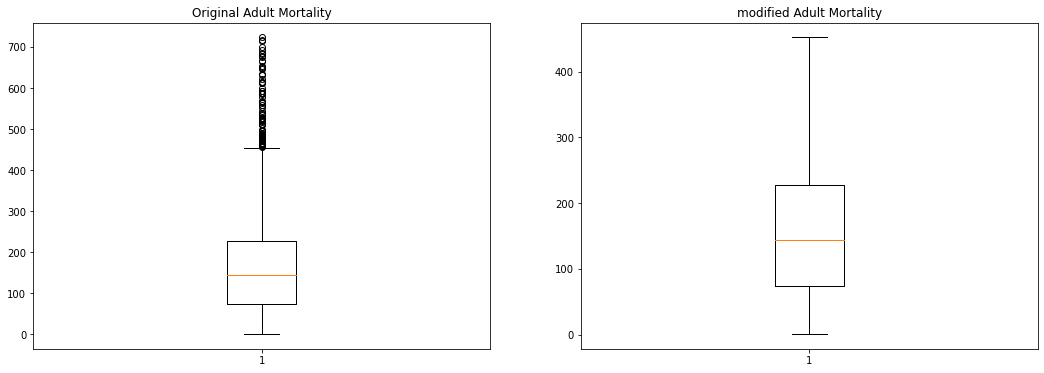

In [34]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = df_limpio['Adult Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("Original Adult Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df_limpio['Adult Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("modified Adult Mortality")

plt.show()

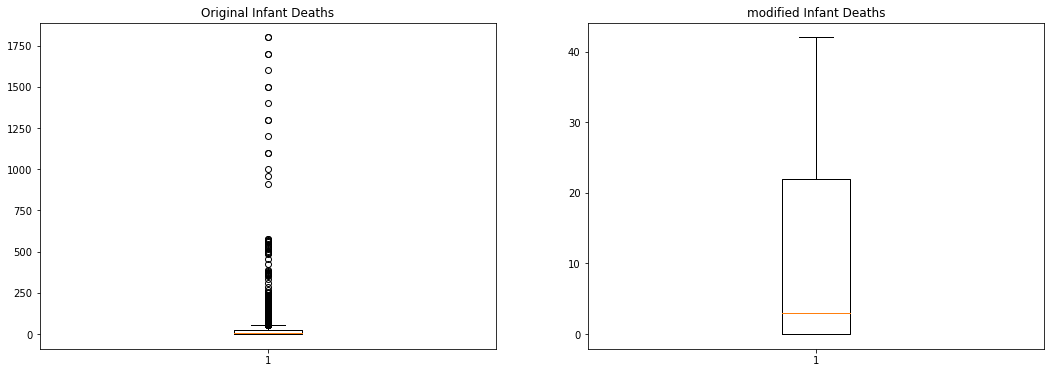

In [35]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = df_limpio['infant deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("Original Infant Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df_limpio['infant deaths'],(0,0.15))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("modified Infant Deaths")

plt.show()

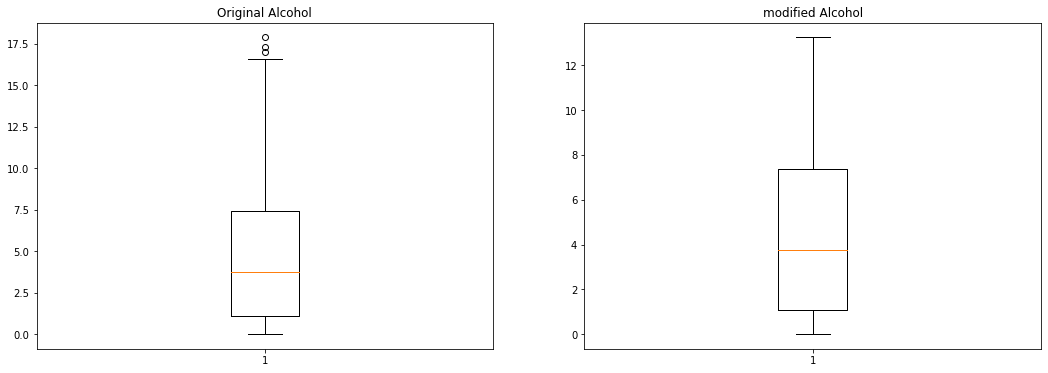

In [36]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = df_limpio['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("Original Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df_limpio['Alcohol'],(0,0.015))
plt.boxplot(winsorized_Alcohol)
plt.title("modified Alcohol")

plt.show()

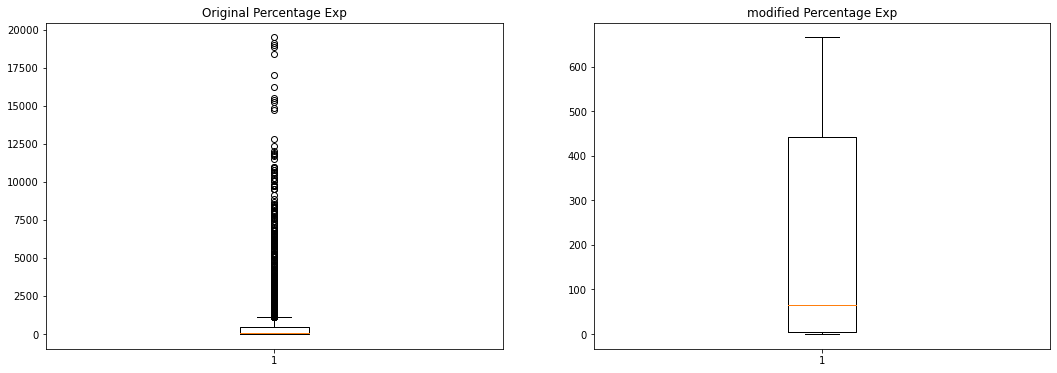

In [37]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = df_limpio['percentage expenditure']
plt.boxplot(original_Percentage_Exp)
plt.title("Original Percentage Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(df_limpio['percentage expenditure'],(0,0.19))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("modified Percentage Exp")

plt.show()

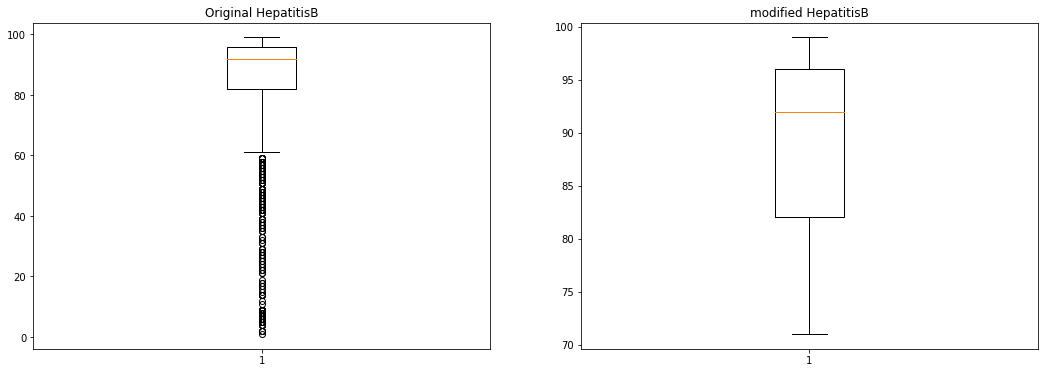

In [38]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = df_limpio['Hepatitis B']
plt.boxplot(original_HepatitisB)
plt.title("Original HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(df_limpio['Hepatitis B'],(0.16,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("modified HepatitisB")

plt.show()

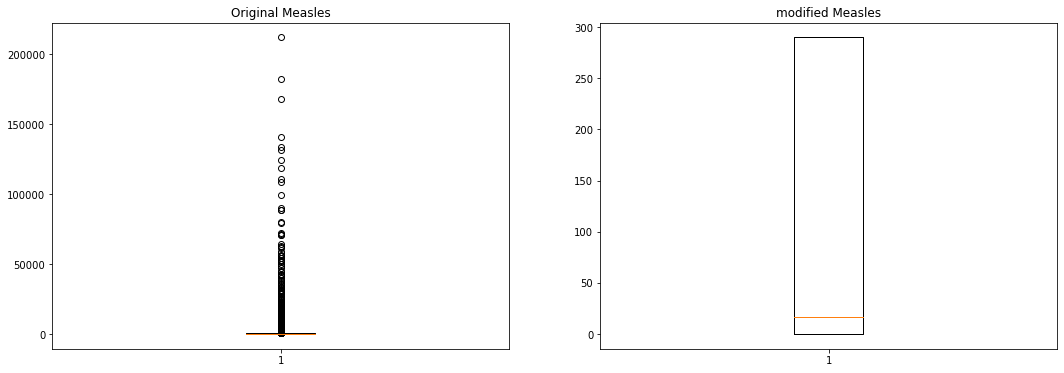

In [39]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = df_limpio['Measles ']
plt.boxplot(original_Measles)
plt.title("Original Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(df_limpio['Measles '],(0,0.27))
plt.boxplot(winsorized_Measles)
plt.title("modified Measles")

plt.show()

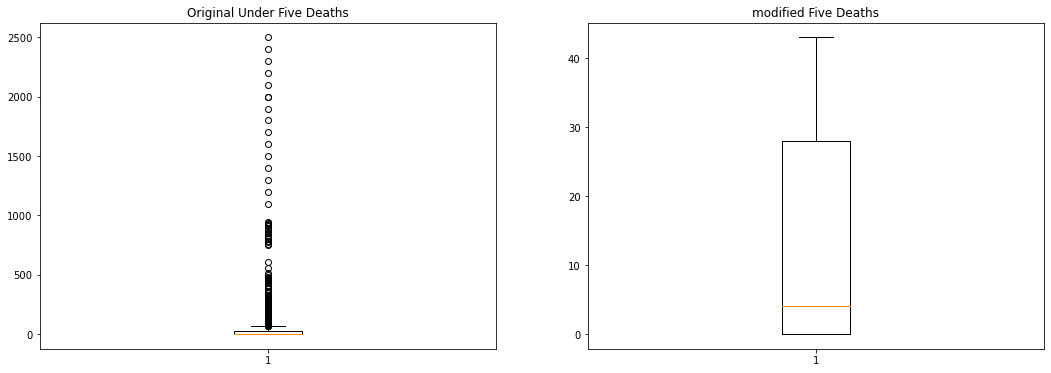

In [40]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df_limpio['under-five deaths ']
plt.boxplot(original_Under_Five_Deaths)
plt.title("Original Under Five Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(df_limpio['under-five deaths '],(0,0.19))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("modified Five Deaths")

plt.show()

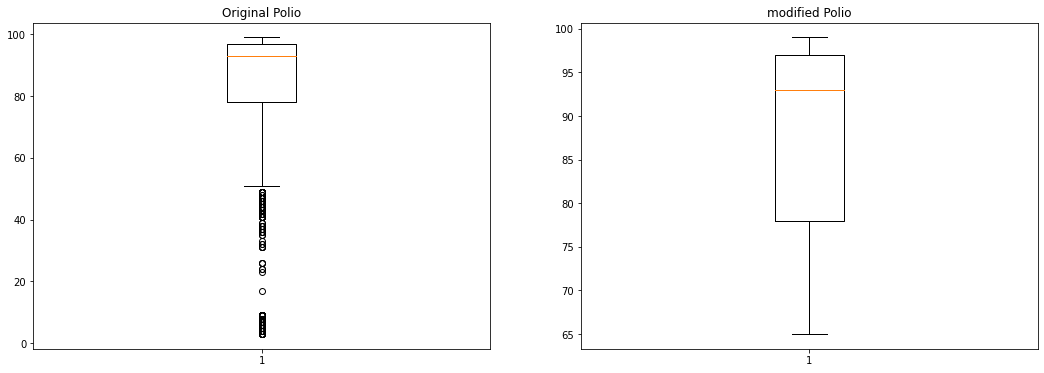

In [41]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = df_limpio['Polio']
plt.boxplot(original_Polio)
plt.title("Original Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(df_limpio['Polio'],(0.14,0))
plt.boxplot(winsorized_Polio)
plt.title("modified Polio")

plt.show()

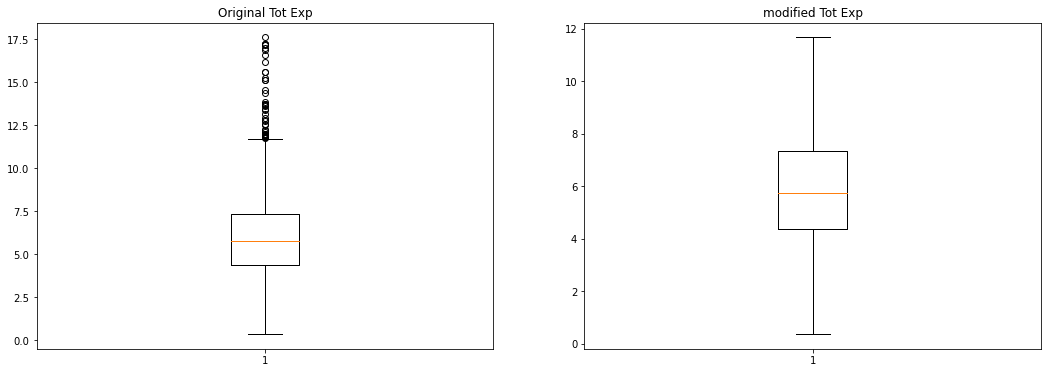

In [42]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = df_limpio['Total expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("Original Tot Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(df_limpio['Total expenditure'],(0,0.02))
plt.boxplot(winsorized_Tot_Exp)
plt.title("modified Tot Exp")

plt.show()

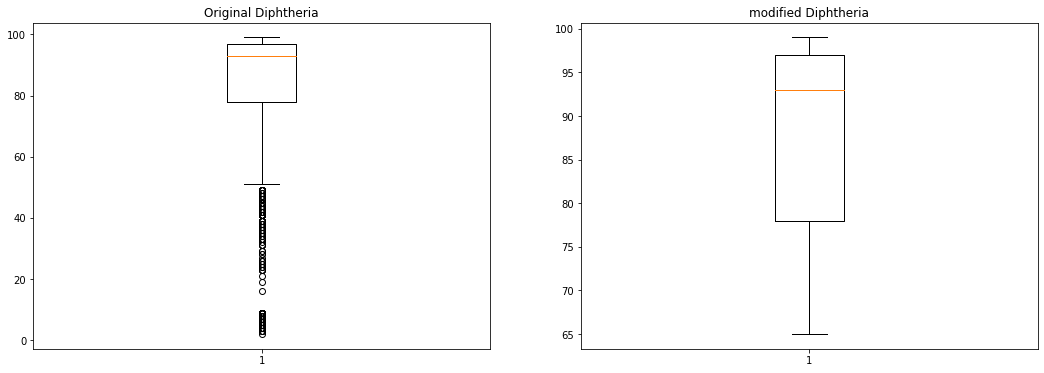

In [43]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = df_limpio['Diphtheria ']
plt.boxplot(original_Diphtheria)
plt.title("Original Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(df_limpio['Diphtheria '],(0.15,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("modified Diphtheria")

plt.show()

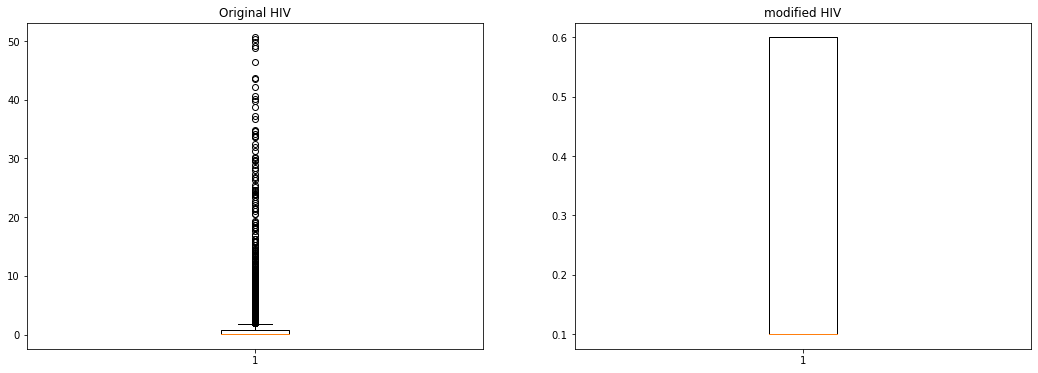

In [44]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df_limpio[' HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("Original HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df_limpio[' HIV/AIDS'],(0,0.27))
plt.boxplot(winsorized_HIV)
plt.title("modified HIV")

plt.show()

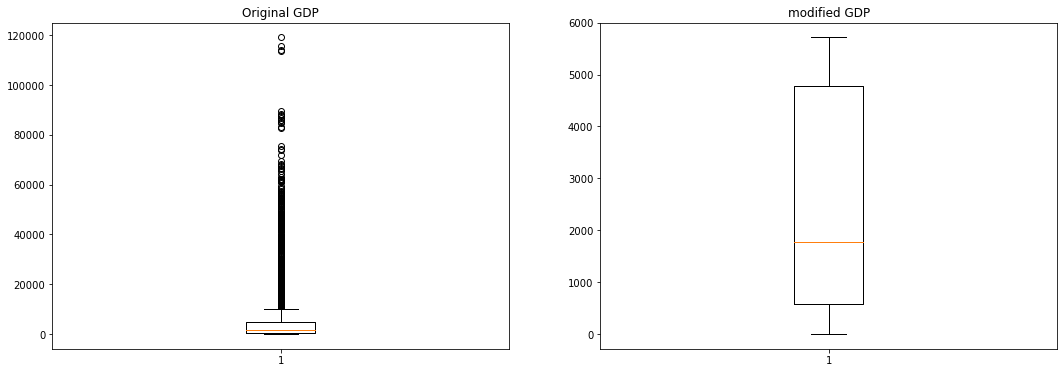

In [45]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = df_limpio['GDP']
plt.boxplot(original_GDP)
plt.title("Original GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(df_limpio['GDP'],(0,0.22))
plt.boxplot(winsorized_GDP)
plt.title("modified GDP")

plt.show()

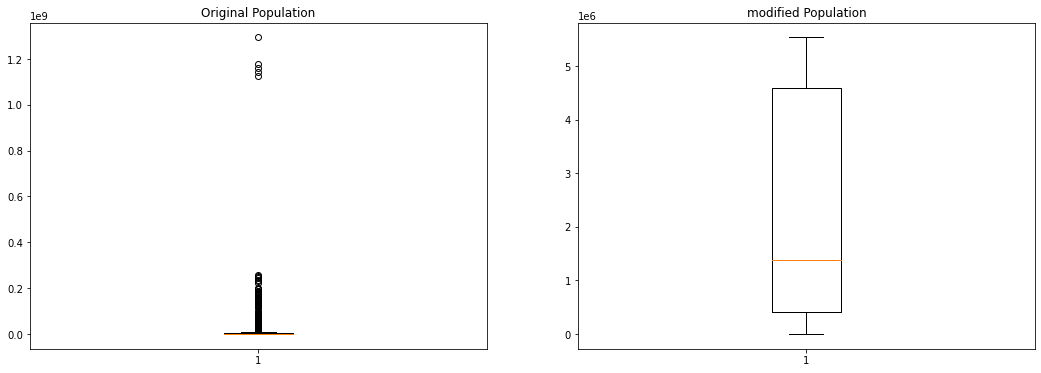

In [46]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df_limpio['Population']
plt.boxplot(original_Population)
plt.title("Original Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(df_limpio['Population'],(0,0.23))
plt.boxplot(winsorized_Population)
plt.title("modified Population")

plt.show()

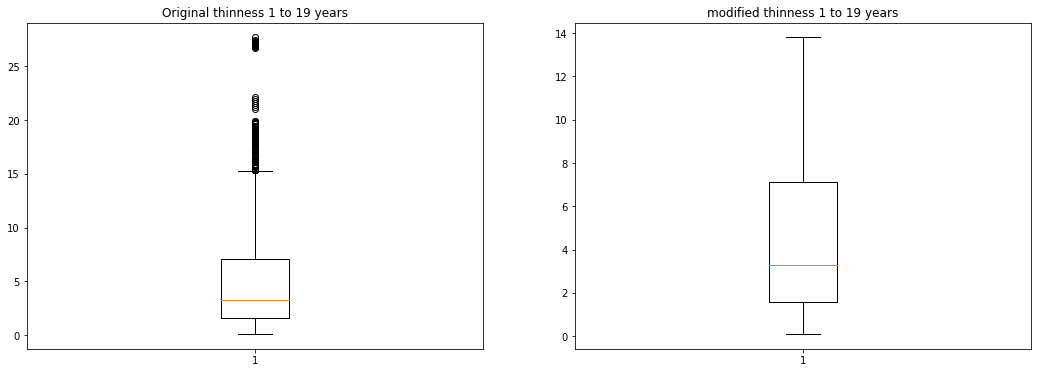

In [47]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = df_limpio[' thinness  1-19 years']
plt.boxplot(original_thinness_1to19_years)
plt.title("Original thinness 1 to 19 years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(df_limpio[' thinness  1-19 years'],(0,0.05))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("modified thinness 1 to 19 years")

plt.show()

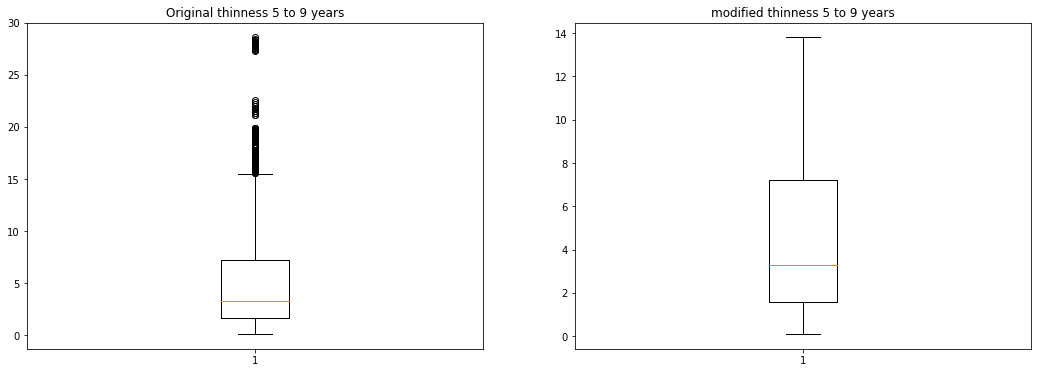

In [48]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = df_limpio[' thinness 5-9 years']
plt.boxplot(original_thinness_5to9_years)
plt.title("Original thinness 5 to 9 years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(df_limpio[' thinness 5-9 years'],(0,0.05))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("modified thinness 5 to 9 years")

plt.show()

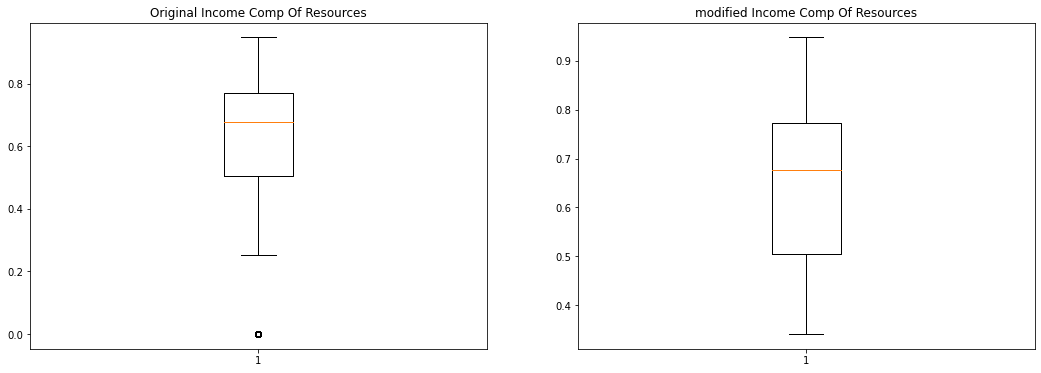

In [49]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = df_limpio['Income composition of resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("Original Income Comp Of Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(df_limpio['Income composition of resources'],(0.07,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("modified Income Comp Of Resources")

plt.show()

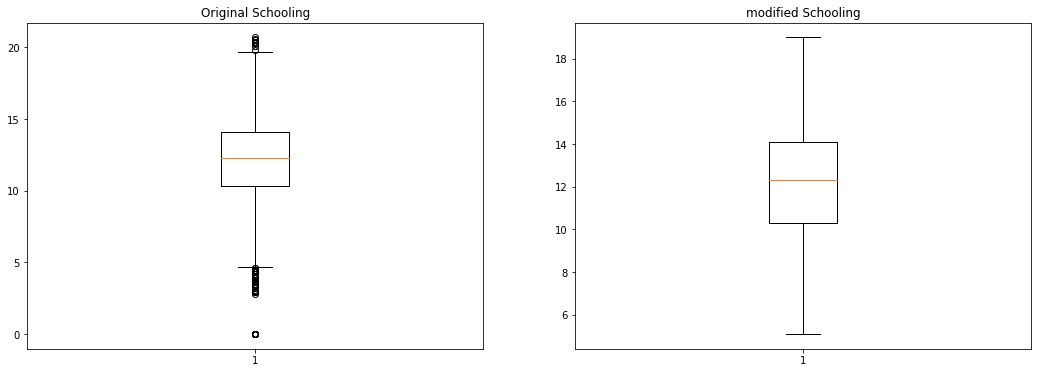

In [50]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = df_limpio['Schooling']
plt.boxplot(original_Schooling)
plt.title("Original Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(df_limpio['Schooling'],(0.03,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("modified Schooling")

plt.show()